Most of the topics discussed in this chapter will be essential in understanding, building, and training neural networks.

We will start by looking at the Linear Regression model, one of the simplest models there is. We will discuss two very different ways to train it:

- Using a direct “closed-form” equation that directly computes the model parameters that best fit the model to the training set.
- Using an iterative optimization approach, Gradient Descent (GD), that gradually tweaks the model parameters to minimize the cost function over the training set, eventually converging to the same set of parameters as the first method.

Next we will look at Polynomial Regression, a more complex model that can fit non‐ linear datasets. Since this model has more parameters than Linear Regression, it is more prone to overfitting the training data, so we will look at how to detect whether or not this is the case, using learning curves, and then we will look at several regulari‐ zation techniques that can reduce the risk of overfitting the training set.
Finally, we will look at two more models that are commonly used for classification tasks: Logistic Regression and Softmax Regression.

## 1. Linear Regression

A linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the bias term (also called the intercept term).

- Predicted value = bias + weighted_input_feat_1 + weighted_input_feat_2 + ... + weighted_input_feat_n

Training a model means setting its parameters so that the model best fits the training set. For this purpose, we first need a measure of how well (or poorly) the model fits the training data. The most common performance measure of a regression model is the Root Mean Square Error (RMSE). Therefore, to train a Linear Regression model, you need to find the value of θ (weights) that minimizes the RMSE.

##### The normal equation

There is a closed-form solution to find the value of θ that minimizes the cost function, called the Normal Equation.
- θ=(XTX)^−1 XT y


In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1) # 
y = 4 + 3 * X + np.random.randn(100, 1)

Function used to generate the data is y = 4 + 3x1 + Gaussian noise

[0, 2, 0, 15]

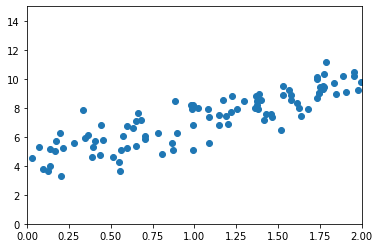

In [2]:
plt.scatter(X, y)
plt.axis([0, 2, 0, 15])

In [3]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # inv() function from NumPy’s Linear Algebra module, 
                                                             # (np.linalg) to compute the inverse of a matrix, 
                                                             # and the dot() method for matrix multiplication
theta_best

array([[4.29996238],
       [2.79155055]])

We would have hoped for θ0 = 4 and θ1 = 3 instead of θ0 = 4.215 and θ1 = 2.770. Close enough, but the noise made it impossible to recover the exact parameters of the original function

In [4]:
# predictions using theta hat:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.8369718 ],
       [9.62905903]])

[0, 2, 0, 15]

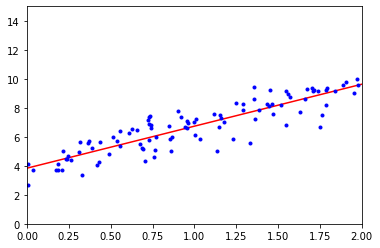

In [5]:
# plot predictions
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])

Let's perform linear regression with skclearn


In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.8369718]), array([[2.89604361]]))

In [7]:
lin_reg.predict(X_new)

array([[3.8369718 ],
       [9.62905903]])

##### Singular value decomposition

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.8369718 ],
       [2.89604361]])

In [9]:
np.linalg.pinv(X_b).dot(y)

array([[3.8369718 ],
       [2.89604361]])

Computed using a standard matrix factorization technique
called Singular Value Decomposition (SVD) that can decompose the training set
matrix X into the matrix multiplication of three matrices U Σ VT

This approach is more efficient than computing the Normal Equation, plus it handles edge cases nicely: indeed, the Normal Equation may not work if the matrix XTX is not invertible (i.e., singular), such as if m < n or if some features are redundant, but the pseudoinverse is always defined.

Now we will look at very different ways to train a Linear Regression model, better suited for cases where there are a large number of features, or too many training instances to fit in memory.

## 2. Gradient descent

The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function. It measures the local gradient of the error function with regards to the parameter vector θ, and it goes in the direction of descending gradient. Once the gradient is zero, we have reached a minimum.

Concretely, we start by filling θ with random values (random initialization), and then we improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g., the MSE), until the algorithm converges to a minimum.

An important parameter in Gradient Descent is the size of the steps, determined by the learning rate hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time. On the other hand, if the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution.

Finally, not all cost functions look like nice regular bowls. There may be holes, ridges, plateaus, and all sorts of irregular terrains, making convergence to the minimum very difficult.

Fortunately, the MSE cost function for a Linear Regression model happens to be a convex function, which means that if we pick any two points on the curve, the line segment joining them never crosses the curve. This implies that there are no local minima, just one global minimum.

Training a model means searching for a combination of model parameters that minimizes a cost function (over the training set). It is a search in the model’s parameter space: the more parameters a model has, the more dimensions this space has, and the harder the search is: searching for a needle in a 300-dimensional haystack is much trickier than in three dimensions.

##### Batch gradient descent

To implement GD, we need to calculate how much the cost function will change if you change θj just a little bit (a partial derivative). Batch GD uses the whole batch of training data at every step (actually, Full Gradient Descent would probably be a better name). As a result it is terribly slow on very large training sets. However, Gradient Descent scales well with the number of features; training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation or SVD decomposition.

In [10]:
# an implementation:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [11]:
theta # results

array([[3.8369718 ],
       [2.89604361]])

##### Stochastic gradient descent

Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance. Obviously this makes the algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration.

Randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum.

In [12]:
# implementing Stochastic Gradient Descent using a simple learning schedule
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_indx = np.random.randint(m)
        xi = X_b[random_indx:random_indx + 1]
        yi = y[random_indx:random_indx + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients 

In [13]:
theta

array([[3.82383944],
       [2.85946159]])

Performing SGD with sklearn

In [14]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.79017869]), array([2.86490421]))

##### Mini-batch gradient descent

Instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called mini-batches. The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

## 3. Polynomial regression

A simple way to do fit non linear problems is to add powers of each feature as new features, then train a linear model on this extended set of features.

Function is y = 0.5x21 + 1.0x1 + 2.0 + Gaussian noise.

In [15]:
# generate some nonlinear data
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

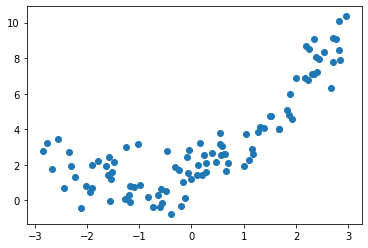

In [16]:
# plot
plt.scatter(X, y)

Let’s use Scikit-Learn’s PolynomialFeatures class to transform our training data, adding the square (2nd-degree polynomial) of each feature in the training set as new features (in this case there is just one feature).

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_feat = PolynomialFeatures(degree=2, include_bias= False)
X_poly = poly_feat.fit_transform(X)
print(X[0])
print(X_poly[0]) # contains the original feature of X plus the square of this feature

[2.70418366]
[2.70418366 7.31260927]


In [18]:
# fit a LinearRegression model to this extended training data
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.4781135]), array([[1.14952129, 0.56118317]]))

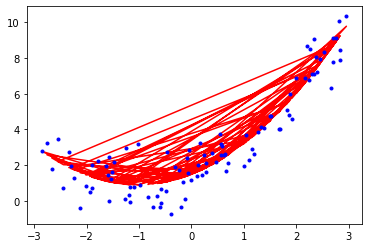

In [19]:
# plot predictions
y_predict = lin_reg.predict(X_poly)
plt.plot(X, y_predict, 'r-')
plt.plot(X, y, "b.")
plt.show()

##### Learning curves

In Chapter 2 you used cross-validation to get an estimate of a model’s generalization performance. If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting. If it performs poorly on both, then it is underfitting. This is one way to tell when a model is too simple or too complex.

Another way is to look at the learning curves: these are plots of the model’s performance on the training set and the validation set as a function of the training set size (or the training iteration).

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def learning_curve_plot(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='validation')

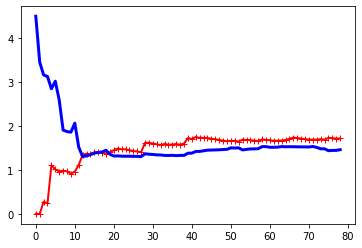

In [21]:
# linear regressor learning curves
lin_reg = LinearRegression()
learning_curve_plot(lin_reg, X, y)

The model can fit the training data perfectly at the time of two or three instances (curve starts at zero), butas new instances are added, it becomes impossible for the model to fit the training data, because data is noisy and also, it's actually non linear. So error in training data reaches a plateau where more instances won't make a difference.

Tha validation data, on the other hand, can't be fitted in the inital instances (it's quite high at the begining), but it learns as instances are used. However, as a linear model, it will also reach a plateau.

These curves are tipical of an underfitting model, so adding more training examples won't help. We'll need a more complex model.

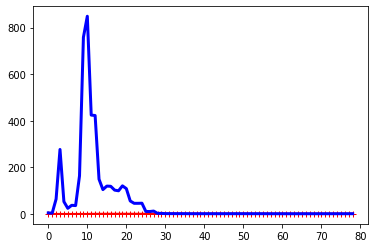

In [22]:
# learning curves of a 10th degree polynomial
from sklearn.pipeline import Pipeline

pol_reg = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

learning_curve_plot(pol_reg, X, y)

Error in training data is much higher, and the gap between the curves shows that training data performs better than that of validation data, which points to an overfitting problem. A way to improve overfitting models may be to feed it more training data until validation error reaches the training error.

##### The bias/variance tradeoff

An important result on statistics in ML is that a model's generalization error can be expressed as the sum of three (very) different errors.

- Bias: generalization error due to wrong assumptions, such as assuming linear data when it's quadratic. High bias model is most likely to underfit the training data.

- Variance: This is due to a model's excessive sensitivity to small variations in training data. Result is overfitting.

- Irreducible error: Due to the noisiness of data itself. Only way to reduce it is to clean the data (detect/remove outliers, fix data sources..)

Increasing the model's complexity will increase its variance and reduce bias. Reducing a model's complexity increases bias and reduces variance.

## 4. Regularized linear models

A good way to reduce overfitting is to regularize the model (i.e., to constrain it). For a linear model, regularization is tipically achieved by constraining the weights of the model. 

##### Ridge regression

Where a regularization term equal to α∑n θ 2 is added to the cost function. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularization term should only be added to the cost function during training. Once the model is trained, we'll want to evaluate the model’s performance using the unregularized performance measure.

The hyperparameter α controls how much you want to regularize the model. If α = 0 then Ridge Regression is just Linear Regression. If α is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean.

In [23]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

In [24]:
# ridge reg predict
ridge_reg.predict([[1.5]])

array([[4.99487174]])

In [25]:
# using SGD
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])


array([5.00484356])

##### Lasso regression

Just like Ridge Regression, it adds a regularization term to the cost function, but it uses the l1 norm of the weight vector instead of half the square of the l2 norm.

An important characteristic of Lasso Regression is that it tends to completely elimi‐ nate the weights of the least important features (setting them to zero). In other words, lasso automatically performs feature selection and outputs a sparse model (few non zero feature weights)

In [26]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.95318804])

##### Elastic net

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is equivalent to Lasso Regression.

When should we use plain Linear Regression (i.e., without any regularization), Ridge, Lasso, or Elastic Net? It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression. Ridge is a good default, but if you suspect that only a few features are actually useful, you should pre‐ fer Lasso or Elastic Net since they tend to reduce the useless features’ weights down to zero as we have discussed. In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

In [27]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.94529284])

##### Early stopping

Another way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. 

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

# data preparation
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=np.infty, warm_start=True,
                      penalty=None, learning_rate='constant', eta0=0.0005)
minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  Convergenc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  Convergenc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, w

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, w

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  Convergenc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  Convergenc

## 5. Logistic regression

Logistic Regression is commonly used to estimate the probability that an instance belongs to a particular class. If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), or else it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier.

##### Estimating probabilities

Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result, which in turn is a sigmoid function outputting a number bewtween 0 and 1.

##### Training and cost function

The objective of training is to set the parameter vector θ so that the model estimates high probabilities for positive instances (y = 1) and low probabilities for negative instances (y = 0). The cost function over the whole training set is simply the average cost over all training instances. It can be written in a single expression (as you can verify easily), called the log loss.
 
The bad news is that there is no known closed-form equation to compute the value of θ that minimizes this cost function (there is no equivalent of the Normal Equation). But the good news is that this cost function is convex, so Gradient Descent (or any other optimization algorithm) is guaranteed to find the global minimum.

##### Decision boundaries

Let’s try to build a classifier to detect the Iris-Virginica type based only on the petal width feature.

In [4]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [30]:
X = iris['data'][:, 3:] # petal width
y = (iris['target'] == 2).astype(np.int) # 1 if iris virginica, else 0 

In [31]:
# train a logistic regressor
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Let's see the model's estimated probabilities for flowers with petal widths varying from 0 to 3.

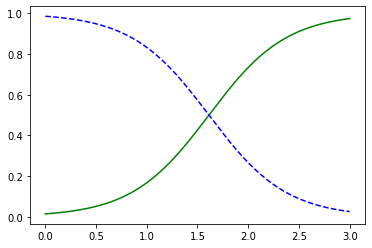

In [32]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_prob = log_reg.predict_proba(X_new)
plt.plot(X_new, y_prob[:, 1], 'g-', label='Iris Virginica')
plt.plot(X_new, y_prob[:, 0], 'b--', label='Not Virginica')

In [34]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

Using the predict() method rather than the predict_proba() gives whichever class is the most likely, here, 1.7 petal width corresponds to virginica, whilst 1.5 does not.

The hyperparameter controlling the regularization strength of a Scikit-Learn LogisticRegression model is not alpha (as in other linear models), but its inverse: C. The higher the value of C, the less the model is regularized.

## 6. Softmax regression

Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers. This is called Softmax Regression, or Multinomial Logistic Regression.

The softmax function computes the exponential of every score, then normalizes them (dividing by the sum of all the exponentials). The scores are generally called logits or log-odds (although they are actually unnormalized log- odds). Softmax Regression classifier predicts the class with the highest estimated probability (which is simply the class with the highest score).

The Softmax Regression classifier predicts only one class at a time (i.e., it is multiclass, not multioutput) so it should be used only with mutually exclusive classes such as different types of plants. You cannot use it to recognize multiple people in one picture.

##### Cross entropy

Cross entropy is frequently used to measure how well a set of estimated class probabilities match the target classes.

Let’s use Softmax Regression to classify the iris flowers into all three classes. 

In [35]:
X = iris['data'][:, (2, 3)] # petal length, petal width
y = iris['target']

In [36]:
softmax_reg = LogisticRegression(multi_class = 'multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
softmax_reg.predict([[5, 2]]) # 5cm long petal and 2cm wide petal


array([2])

It'd be class 2 (virginica)

In [38]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

Exercise 12.
Batch Gradient Descent w/ early stopping for Softmax regression (without Scikit Learn)

In [5]:
# reusing iris dataset from earlier
X = iris['data'][:, (2, 3)] # petal length, petal width
y = iris['target']

In [6]:
# adding bias term X0 = 1
X_with_bias = np.c_[np.ones([len(X), 1]), X]

In [7]:
# adding random seed
np.random.seed(2042)

An implementation for the split:

In [ ]:
test_ratio = 0.2
val_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
val_size = int(total_size * val_ratio)
train_size = total_size - test_size - val_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[: train_size]] 
y_train = y[rnd_indices[: train_size]]
X_val = = X_with_bias[rnd_indices[train_size: -train_size]]
y_val
X_test
y_test